# Session 3a

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [77]:
customer_data = pd.read_csv("Retail Data v4 - unclean.csv")

In [78]:
customer_data[0:20]

,Age,Gender,Married,Salary,Annual Spend
0,28.2,Male,Single,26908.95,331.56
1,43.5,Female,Married,39366.44,3071.18
2,27.7,Female,Single,NaN,1357.19
3,18.9,Male,Single,26235.55,769.78
4,18.0,Male,Single,30822.14,100.00
5,22.9,Female,Single,18334.52,2854.59
6,43.5,Female,Married,36642.04,1926.37
7,28.0,Male,Single,34612.04,853.10
8,52.3,Female,Married,34779.79,NaN
9,27.2,Female,Single,21901.08,566.21


In [79]:
print(customer_data.isnull().sum().sum())

29


In [80]:
import missingno as msno
customer_data_some_columns = customer_data.iloc[:, 0:6:1]
msno.matrix(customer_data_some_columns)

<AxesSubplot: >

In [81]:
msno.bar(customer_data_some_columns)

<AxesSubplot: >

In [82]:
customer_data['Age'].fillna(customer_data['Age'].mean(), inplace=True)
customer_data['Salary'].fillna(customer_data['Salary'].mean(), inplace=True)
customer_data['Annual Spend'].fillna(customer_data['Annual Spend'].mean() ,inplace=True)

In [83]:
print(customer_data.isnull().sum().sum())

0


In [84]:
column_name = 'Gender'
one_hot = pd.get_dummies(customer_data[column_name], prefix='')
customer_data.drop(column_name, axis=1, inplace=True)
customer_data = one_hot.join(customer_data)

column_name = 'Married'
one_hot = pd.get_dummies(customer_data[column_name], prefix='')
customer_data.drop(column_name, axis=1, inplace=True)
customer_data = one_hot.join(customer_data)

In [85]:
customer_data[0:5]

,_Married,_Single,_Female,_Male,Age,Salary,Annual Spend
0,0,1,0,1,28.2,26908.950000,331.56
1,1,0,1,0,43.5,39366.440000,3071.18
2,0,1,1,0,27.7,36629.132727,1357.19
3,0,1,0,1,18.9,26235.550000,769.78
4,0,1,0,1,18.0,30822.140000,100.00


In [86]:
from pandas.plotting import scatter_matrix
customer_data_fewer_columns = customer_data.iloc[:, 4:7:1]
scatter_matrix(customer_data_fewer_columns, figsize=(12,12));

In [87]:
standardized_customer_data = preprocessing.scale(customer_data)
standardized_customer_data_df = pd.DataFrame(standardized_customer_data, columns = customer_data.columns)

In [88]:
from sklearn import metrics
def k_silhouette(X, clusters):
    K = range(2, clusters+1)
    S = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    
    plt.plot(K, S, 'b*-')
    plt.xlabel('k')
    plt.ylabel('silhouette_score')
    
    plt.show();

    
k_silhouette(standardized_customer_data_df, 15)

In [89]:
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,)
    kmeans.fit(standardized_customer_data_df)
    sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

In [90]:
kmeans = KMeans(n_clusters=4)

In [91]:
kmeans.fit(standardized_customer_data_df)

KMeans(n_clusters=4)

In [92]:
y_km = kmeans.fit_predict(standardized_customer_data_df)

In [93]:
print (y_km[0:20])

[3 0 1 3 3 1 0 3 0 1 0 1 1 0 1 1 0 1 2 1]


In [94]:
print(customer_data[y_km==2][0:10])

    _Married  _Single  _Female  _Male        Age    Salary  Annual Spend
18         1        0        0      1  39.605578  48905.96       3105.87
21         1        0        0      1  58.000000  60550.50       2837.73
22         1        0        0      1  61.600000  51015.63       3652.15
38         1        0        0      1  60.000000  56137.24       2748.58
39         1        0        0      1  52.600000  57279.71       3782.55
43         1        0        0      1  52.700000  56461.55       3387.55
57         1        0        0      1  60.800000  48708.03       3957.25
65         1        0        0      1  83.600000  55756.02       3253.58
67         1        0        0      1  71.600000  53496.84       2531.67
72         1        0        0      1  41.800000  53441.35       2910.29


In [95]:
plt.figure(figsize=(7,7))
plt.scatter(customer_data[y_km ==0]['Age'], customer_data[y_km == 0]['Salary'],
s=15, c='red', alpha=.5)
plt.scatter(customer_data[y_km ==1]['Age'], customer_data[y_km == 1]['Salary'],
s=15, c='black', alpha=.5)
plt.scatter(customer_data[y_km ==2]['Age'], customer_data[y_km == 2]['Salary'],
s=15, c='blue', alpha=.5)
plt.scatter(customer_data[y_km ==3]['Age'], customer_data[y_km == 3]['Salary'],
s=15, c='cyan', alpha=.5)

In [96]:
plt.figure(figsize=(7,7))
plt.scatter(customer_data[y_km ==0]['Annual Spend'], customer_data[y_km == 0]['Salary'],
s=15, c='red', alpha=.5)
plt.scatter(customer_data[y_km ==1]['Annual Spend'], customer_data[y_km == 1]['Salary'],
s=15, c='black', alpha=.5)
plt.scatter(customer_data[y_km ==2]['Annual Spend'], customer_data[y_km == 2]['Salary'],
s=15, c='blue', alpha=.5)
plt.scatter(customer_data[y_km ==3]['Annual Spend'], customer_data[y_km == 3]['Salary'],
s=15, c='cyan', alpha=.5)

In [97]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

In [98]:
%matplotlib
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
ax.set_xlabel('Annual Spend')
ax.set_ylabel('Salary')
ax.set_zlabel('Age')
ax.scatter(customer_data[y_km ==0]['Annual Spend'], customer_data[y_km == 0]['Salary'],customer_data[y_km == 0]['Age'],s=15, c='red', alpha=.3) 
ax.scatter(customer_data[y_km ==1]['Annual Spend'], customer_data[y_km == 1]['Salary'],customer_data[y_km == 1]['Age'],s=15, c='black', alpha=.3) 
ax.scatter(customer_data[y_km ==2]['Annual Spend'], customer_data[y_km == 2]['Salary'],customer_data[y_km == 2]['Age'],s=15, c='blue', alpha=.3) 
ax.scatter(customer_data[y_km ==3]['Annual Spend'], customer_data[y_km == 3]['Salary'],customer_data[y_km == 3]['Age'],s=15, c='cyan', alpha=.3)

Using matplotlib backend: MacOSX


# Session 3b

In [99]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import random as rand
import numpy as np
%matplotlib

Using matplotlib backend: MacOSX


In [100]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

In [101]:
xGrad = 5 
yGrad = 7 
noiseSD = .05

x = [] 
y = [] 
z=[]

for i in range(100):
    xItem = rand.randint(1,200)
    yItem = rand.randint(1,200)
    x.append(xItem)
    y.append(yItem)
    noise = np.random.normal(0, scale=50.0) 
    z.append((xItem * xGrad) + (yItem * yGrad) + noise)

In [102]:
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X') 
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
fig.show()

In [103]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

Using matplotlib backend: MacOSX


In [104]:
from sklearn.datasets import load_digits 
digits = load_digits()

In [105]:
digits.data.shape

(1797, 64)

In [106]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [107]:
plt.gray()
plt.matshow(digits.images[0]) 
plt.show()

In [108]:
pca = PCA(3) 
projected = pca.fit_transform(digits.data)

In [109]:
print(digits.data.shape) 
print(projected.shape)

(1797, 64)
(1797, 3)


In [110]:
projected

array([[ -1.25946642,  21.27488333,  -9.46305499],
       [  7.95760882, -20.76870106,   4.43948914],
       [  6.99192451,  -9.95598505,   2.958573  ],
       ...,
       [ 10.80128396,  -6.96025253,   5.59956221],
       [ -4.8721051 ,  12.42394912, -10.17090642],
       [ -0.34438745,   6.36555091,  10.77372512]])

In [111]:
x = projected[:,0] 
y = projected[:,1] 
z = projected[:,2]

In [113]:
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111, projection='3d')

In [114]:
ax2.scatter(x, y,z, 
            c=digits.target,
            cmap=plt.cm.get_cmap('Spectral', 10))
ax2.set_xlabel('X Label') 
ax2.set_ylabel('Y Label') 
ax2.set_zlabel('Z Label')
fig2.show()

In [115]:
pca = PCA(2) #
projected = pca.fit_transform(digits.data)

In [116]:
plt.figure(figsize=(8,8)) 
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10)) 
plt.xlabel('component 1')
plt.ylabel('component 2') 
plt.colorbar();

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

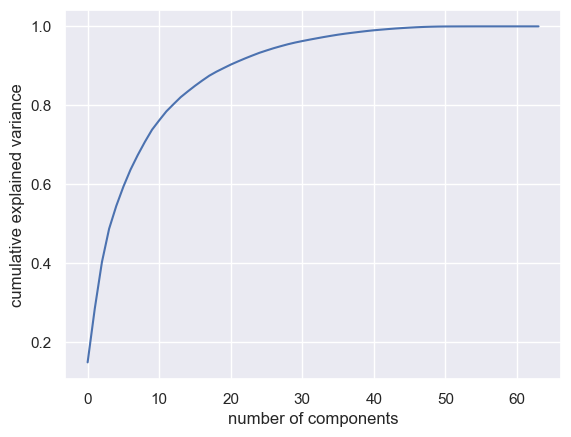

In [117]:
%matplotlib inline
pca = PCA().fit(digits.data) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 
np.cumsum(pca.explained_variance_ratio_)

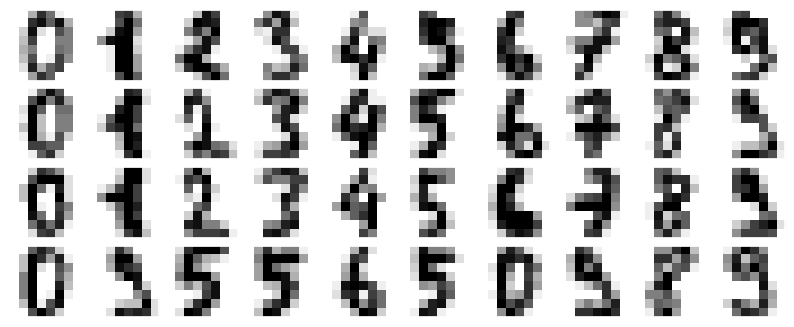

In [118]:
%matplotlib inline 
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), 
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                cmap='binary', interpolation='nearest',
                clim=(0, 16)) 
plot_digits(digits.data)

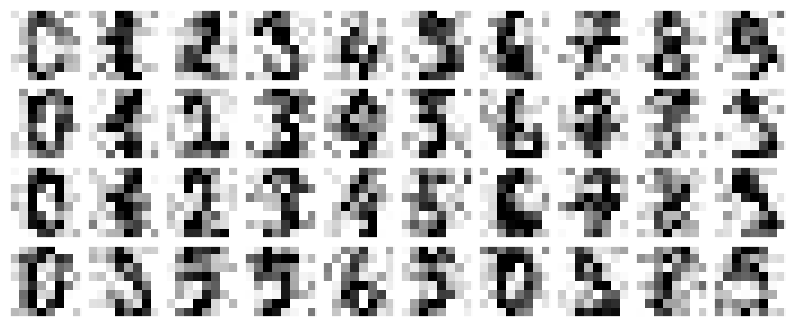

In [119]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4) 
plot_digits(noisy)

In [120]:
pca = PCA(0.50).fit(noisy) 
pca.n_components_

12

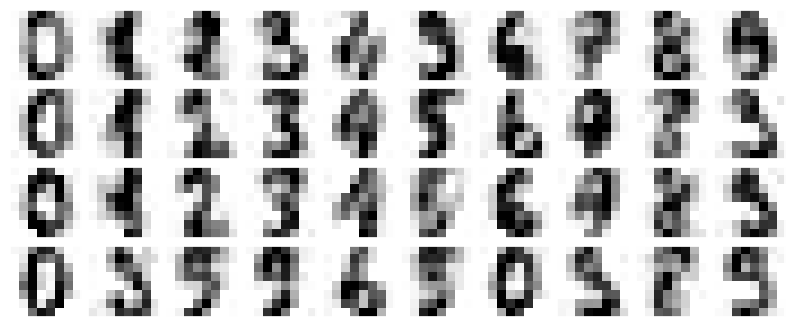

In [121]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components) 
plot_digits(filtered)

In [123]:
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) 
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [124]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150, svd_solver='randomized') 
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

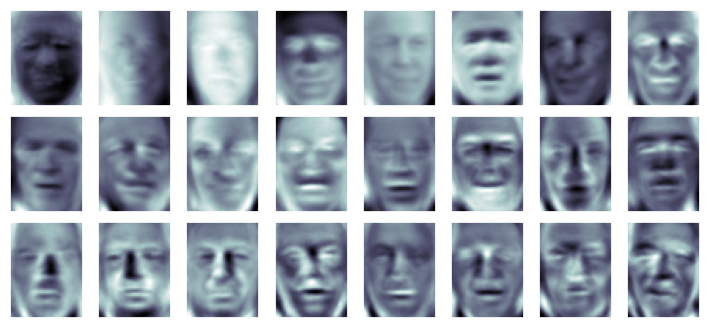

In [125]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

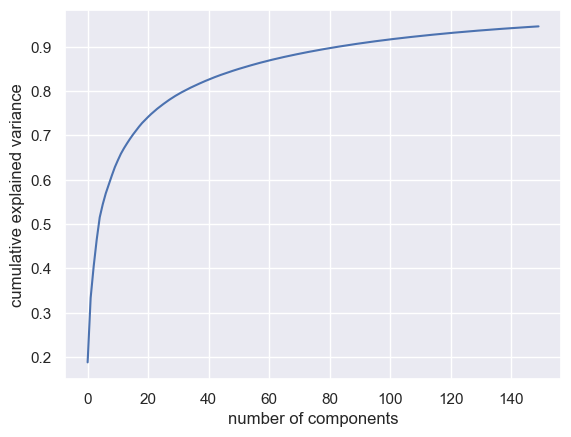

In [126]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

In [127]:
pca = RandomizedPCA(90).fit(faces.data) 
components = pca.transform(faces.data) 
projected = pca.inverse_transform(components)

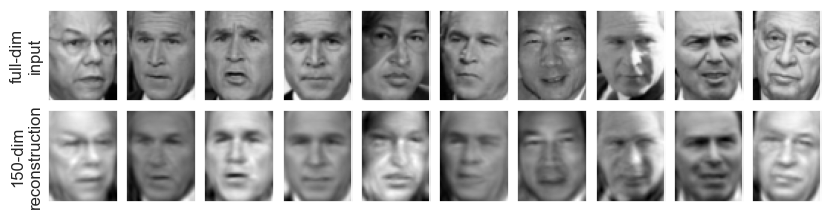

In [128]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), 
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');